---
layout: post
title:  "Reinforcement Learning: Q-learning and social cooperation"
date:   2022-08-13 10:14:54 +0700
categories: MachineLearning
---

# Introduction

In the Markov decision process (MDP), we know both the transitions and the reward functions. In reinforcement learning (RL), we know neither. We still try to maximize expected utility though. This can be called online learning: when data arrives incrementally and we learn on the go. In other words, reinforcement learning is a setting where agents do some actions, receive feedback about the reward and new state it is in. That's how it learns about the environment and updates its parameters. Here is the reinforcement learning algorithm in general:

For t = 1,2,3..

- Choose action $$ a_t = \pi_a(s_{t-1}) $$

- Get reward $$ r_t $$ and see new state $$ s_t $$

- Update parameters

We would firstly examine how to update params and then how to choose actions.

## Params update (learning)

There are two ways to go in this settings: either we estimate a markov decision process (its probabilities and rewards) and then compute the optimal policy or we estimate the optimal policy directly. The first is called model based learning and the latter is called model free learning.

### Model based

In model based iteration, we estimate the transition as follows:

$$ \hat{P}(s,a,s') = \frac{\text{number of times (s,a,s') occurs}}{ \text{number of times (s,a) occur}} $$

If something never happens before causing the estimate to be $$ \frac{0}{0} $$ just need to set it to $$ \frac{1}{\text{total number of states}} $$ so it is equally probable like any other states.

And the rewards could be estimated by averaging the observed reward in state s:

$$ \hat{R} (s,a,s') = \text{r in (s,a,r,s')} $$ 

Now we can use those estimates above to solve the MDP through policy or value evaluation. In general, the algorithm is executed as follows:

- Initialize random policy $$ \pi $$

- Run $$ \pi $$ for a number of times

- Using the accumulated experience in the MDP, estimate P and R

- Use value iteration to estimate V

- Update $$ \pi $$ using a greedy manner (choose what is simply best at that point)

### Model free

In model free iteration, we estimate $$ V^* $$ (which is related to $$ Q_{\pi}(s,a) $$) directly. Imagine when we don't know P and R, we are in state s, and we take action a, then we end up in state s' with reward r'. Given that, $$ Q_{\pi}(s,a) $$ is the expected utility starting at s, taking action a and then follow policy $$ \pi $$. The utility is simply the discounted cashflow from that point t. With that settings, the estimated expected utility of policy $$ \pi $$ at s would be the average of utility at t $$ u_t $$. $$ \hat{Q}_{\pi}(s,a) $$ can be estimated to be the convex combination of itself and u with (s,a,u): $$ \hat{Q}_{\pi} (s,a) \leftarrow (1 - \alpha) \hat{Q}_{\pi} (s,a) + \alpha u $$ with $$ \alpha = \frac{1}{1+(\text{number of updates to (s,a)})} $$

This is equivalent to:

$$ \Leftrightarrow \hat{Q}_{\pi}(s,a) \leftarrow \hat{Q}_{\pi}(s,a) - \alpha (\hat{Q}_{\pi}(s,a) - u) $$ 

This looks like the update rule for a linear regression using (stochastic) gradient descent. The objective is to least the squares: $$ (\hat{Q}_{\pi}(s,a) - u)^2 $$. $$ \hat{Q}_{\pi}(s,a) $$ can be treated as the prediction and u is the ground truth, this regression would be updated as data coming in (hence the name online learning).

That's how we get estimation of $$ Q_{\pi}(s,a) $$, model free. We can estimate $$ Q_{opt} $$ model free, too, with Q learning.

Here is the Bellman equation:

$$ Q_{opt}(s,a) = \sum_{s'}P(s,a,s'){[R(s,a,s') + \gamma V_{opt}(s')]} $$

For each (s,a,r,s'):

$$ \hat{Q}_{opt}(s,a) \leftarrow (1-\alpha)\hat{Q}_{opt}(s,a) + \alpha(r+ \gamma \hat{V}_{opt}(s') $$

with $$ \hat{V}_{opt}(s') = max_{a' \in A(s')} \hat{Q}_{opt}(s',a') $$

## Action choosing

Apart from learning, there is something we need to do in reinforcement learning: given that we start off fresh and know nothing about the environment, how do we go about exploring the enviroment? One way to do that is to explicitly explore (s,a), another is to explore (s',a') nearby and generalizing. 

### Explore one state at a time

Let's start to discuss some ways of choosing action policies. After we have estimated $$ \hat{Q}_{opt} (s,a) $$, we find $$ \pi_a(s) $$ such that: $$ \pi_a(s) = arg max_{a \in A} \hat{Q}_{opt}(s,a) $$. This is when we are greedy, we choose what is best immediately and there is no exploration at all. The opposite of this would be choosing randomly from the set of actions, this would be fully explorative. Without guidance, the average utility of a full explorative policy would be low. To keep a balance between those two extremes, we adopt something called epsilon-greedy algorithm in which we are greedy (following the first strategy: choose the immediate best), but not always: for some epsilon times, we randomize over the action set. Notice that we can calibrate epsilon and let it change. One nominating example about reinforcement learning is that it is the way the real world works, and in order to navigate it, when we are young, we let epsilon be 1 and when we get older, we should keep it small.

### Generalize

When the state space is big, it is difficult to explore it in a reasonable amount of time. Again, we can reframe this Q learning as a linear regression problem as above, in which the update rule is:

$$ \hat{Q}_{opt}(s,a) \leftarrow \hat{Q}_{opt}(s,a) - \alpha {[\hat{Q}_{opt}(s,a) - (r + \gamma \hat{V}_{opt}(s')]} $$

Now we would add parameters so as to generalize our findings better. For example, in state x, we take action y, and get high rewards, there should be a way for the model to keep that information, and behave similarly in a similar states. As in machine learning, we define (s,a) to be feature with weights $$ \theta $$: $$ \hat{Q}_{opt}(s,a;\theta) = \theta \cdot \phi(s,a) $$. This is the objective function to optimize: $$ (\hat{Q}_{opt}(s,a;\theta) - (r + \gamma \hat{V}_{opt}(s')))^2 $$ (which translates into English as the difference between the estimated value and the real rewards that we get in each state, $$ \hat{Q}_{opt}(s,a;\theta) $$ is the prediction and $$ (r + \gamma \hat{V}_{opt}(s')) $$ is the target). We minimize this error and comes up with the following weight updates:

$$ \theta \leftarrow \theta - \alpha{[ \hat{Q}_{opt}(s,a;\theta) - (r + \gamma \hat{V}_{opt}(s')) ]} \phi(s,a) $$

# Code example

Let's consider an example of Q-learning using a graph for the analogy of a social network. We use the game Prisoner's Dilemma game in game theory to represent social cooperation in society. Starting from node 0, I need to go to node 7. Each node is a person with a level of cooperation. If we cooperate well we both receive 3 points, if we both try to betray the other we both get 2 (which is smaller than 3). If one person cooperates and the other defects, the defector gets 4 points and the cooperator gets 1 points. Naturally if I get high points, my level of cooperation increases, and when I loses, my level of cooperation decreases faster. Apart from the game to play at each node, the Q-learning algorithm is as usual: we approximate the Q-value at each state to be the immediate reward plus the expectation of future reward (since we don't know the future, the algorithm uses the past value of the reward actually). Then we add the payoff from the social game we play with each person in each node to the future reward, as if the psychology of social cooperation affects our optimal value of this total reality. As a result, Q-learning chooses the optimal part to be 0-1-6-7 most of the time. Some other time it chooses 0-1-2-7. It is so because node 2 has very low cooperation level (0.1), node 6 has much higher level of cooperation (0.8). We also accumulate max value of Q and the payoff from the game over time to calculate a number that represent the optimal value of the entire social network. In this case, it is about 60. This scoring allows us to compare among social networks.


In [1]:
import numpy as np
import random

payoffs = [[[3,3],[1,4]],[[4,1],[2,2]]]

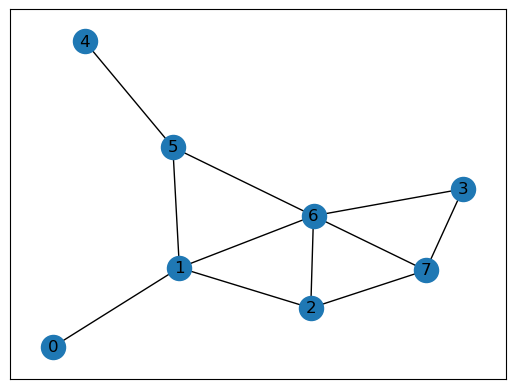

In [2]:
import pylab as plt
# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (1,6), (2,7), (6,2),(6,3),(6,7),(3,7)]

c = [0.8, 0.7, 0.1,0.4,0.7,0.4,0.8,0.9] # cooperation level of each node

goal = 7

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

# idea: each connection has a strength

![13ReinforcementLearning_2_0](https://user-images.githubusercontent.com/7457301/225057406-03935350-4d5d-437d-bcfa-48f716ab88c3.png)

In [3]:
# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1
# assign zeros to paths and 10 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point]=10
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 10
    else:
        # reverse of point
        R[point[::-1]]= 0
    
# add goal point round trip
R[goal,goal]= 10
R

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(1, 6)
(2, 7)
(6, 2)
(6, 3)
(6, 7)
(3, 7)


matrix([[-1.,  0., -1., -1., -1., -1., -1., -1.],
        [ 0., -1.,  0., -1., -1.,  0.,  0., -1.],
        [-1.,  0., -1., -1., -1., -1.,  0., 10.],
        [-1., -1., -1., -1., -1., -1.,  0., 10.],
        [-1., -1., -1., -1., -1.,  0., -1., -1.],
        [-1.,  0., -1., -1.,  0., -1.,  0., -1.],
        [-1.,  0.,  0.,  0., -1.,  0., -1., 10.],
        [-1., -1.,  0.,  0., -1., -1.,  0., 10.]])

In [4]:
def play(player_cooperation_level, opponent_cooperation_level):
    player_random_number = random.random()
    opponent_random_number = random.random()
    if player_random_number < player_cooperation_level:
        player_action = 0
    else:
        player_action = 1
    if opponent_random_number < opponent_cooperation_level:
        opponent_action = 0
    else:
        opponent_action = 1
    return payoffs[player_action][opponent_action]
def available_next_steps(step):
    current_step_row = R[step,]
    av_act = np.where(current_step_row >= 0)[1]
    return av_act
def sample_next_step(available_steps_range):
    next_step = int(np.random.choice(available_steps,1))
    return next_step
def update_Q(current_step, next_step, gamma):
    max_index = np.where(Q[next_step,] == np.max(Q[next_step,]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[next_step, max_index]
#     print(max_value)
    Q[current_step, next_step] = R[current_step, next_step] + gamma * (max_value + player_scores[-1])
    return np.max(Q)

In [5]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
gamma = 0.8 # discount
initial_step = 0

initial_opponent_cooperation_level = c[initial_step]
initial_player_cooperation_level = 0.9
player_cooperation_levels = []
player_scores = []
society_scores = []
scores = []

player_cooperation_level = initial_player_cooperation_level
opponent_cooperation_level=initial_opponent_cooperation_level

pay = play(player_cooperation_level, opponent_cooperation_level)
player_scores.append(pay[0])
society_scores.append(pay[1])

# current_step=next_step
available_steps = available_next_steps(initial_step) 
next_step = sample_next_step(available_steps)

score = update_Q(initial_step, next_step, gamma) + player_scores[-1]
scores.append(score)
scores

[1.8]

In [6]:
for i in range(1000):
    opponent_cooperation_level = c[next_step]
    if player_scores[-1] <= 2:
        additional_cooperation_level = -0.0001*player_scores[-1]
    else:
        additional_cooperation_level = 0.00001*player_scores[-1]
    player_cooperation_level = player_cooperation_level + additional_cooperation_level
#     print(i,'player cooperation level', player_cooperation_level)
    player_cooperation_levels.append(player_cooperation_level)
    
    pay = play(player_cooperation_level, opponent_cooperation_level)
    player_scores.append(pay[0])
    society_scores.append(pay[1])
#     print(i, 'player scores',player_scores)

    current_step = next_step
    available_steps = available_next_steps(current_step) 
    next_step = sample_next_step(available_steps)

    score = update_Q(current_step, next_step, gamma) + player_scores[-1]
    scores.append(score)
#     print(i,'scores',scores)

In [7]:
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

Trained Q matrix:
[[  0.          71.78565327   0.           0.           0.
    0.           0.           0.        ]
 [ 61.1957742    0.          79.9918481    0.           0.
   67.96817167  83.76725158   0.        ]
 [  0.          69.27415222   0.           0.           0.
    0.          81.25575053  93.71105749]
 [  0.           0.           0.           0.           0.
    0.          81.25575053  95.9480317 ]
 [  0.           0.           0.           0.           0.
   69.59000796   0.           0.        ]
 [  0.          70.78105285   0.           0.          56.02361651
    0.          81.25575053   0.        ]
 [  0.          72.03680338  76.22459652  82.76265116   0.
   68.77185201   0.         100.        ]
 [  0.           0.          80.75345032  81.78142748   0.
    0.          83.76725158  96.22255855]]


Most efficient path:
[0, 1, 6, 7]


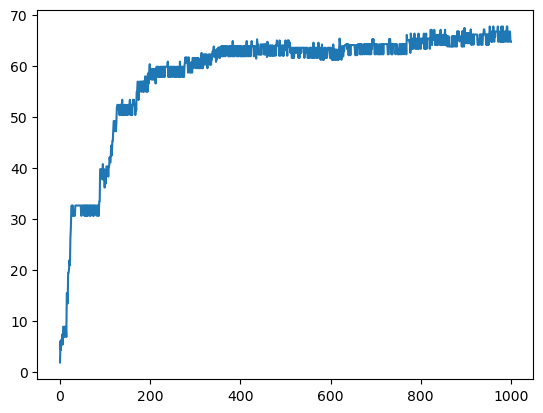

In [8]:
# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()

![13ReinforcementLearning_8_1](https://user-images.githubusercontent.com/7457301/225057426-492c2dd6-52f5-4354-a195-1692a91a1b0e.png)

In [9]:
player_cooperation_levels[-1]

0.8769499999999931